Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.8846 - loss: 0.3725 - val_accuracy: 0.9847 - val_loss: 0.0494
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9827 - loss: 0.0558 - val_accuracy: 0.9847 - val_loss: 0.0454
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9882 - loss: 0.0380 - val_accuracy: 0.9883 - val_loss: 0.0359
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9914 - loss: 0.0282 - val_accuracy: 0.9890 - val_loss: 0.0326
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9927 - loss: 0.0219 - val_accuracy: 0.9886 - val_loss: 0.0356
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9883 - loss: 0.0366

✅ Test Accuracy: 0.9886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


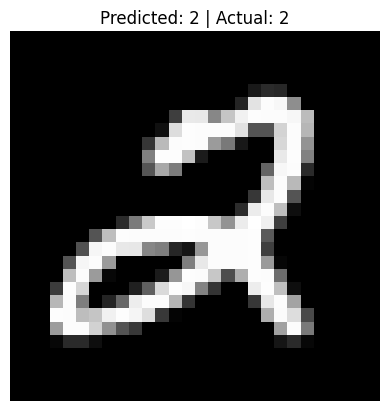

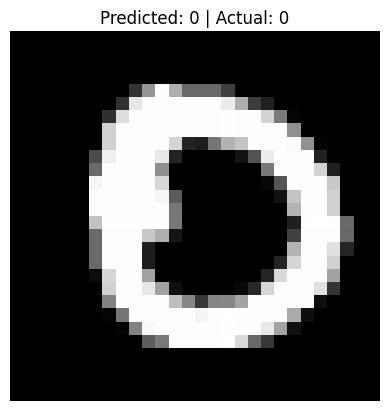

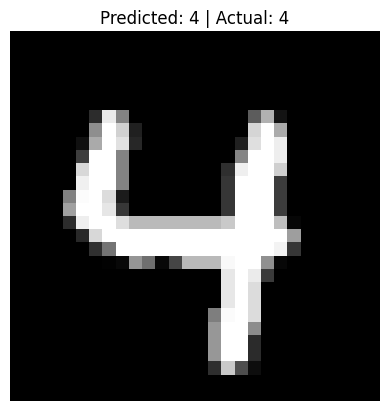

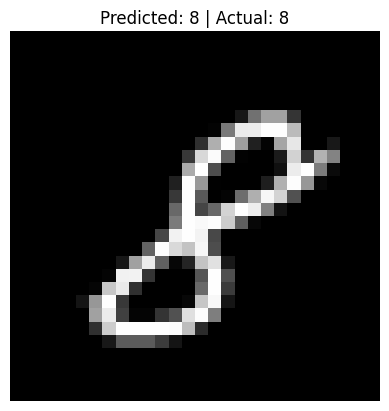

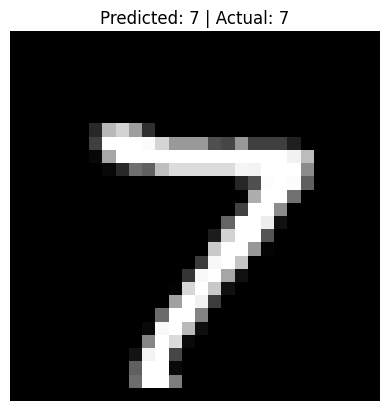

In [2]:

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load dataset from TFDS
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Preprocessing function
def normalize_img(image, label):
    """Normalizes images: uint8 -> float32."""
    return tf.cast(image, tf.float32) / 255.0, label

# Prepare training and test datasets
BATCH_SIZE = 64

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(ds_train, epochs=5, validation_data=ds_test)

# Evaluate
test_loss, test_acc = model.evaluate(ds_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Predict and visualize 5 sample images from the test set
for image, label in ds_test.take(1):
    predictions = model.predict(image[:5])
    for i in range(5):
        plt.imshow(image[i].numpy().squeeze(), cmap='gray')
        plt.title(f"Predicted: {predictions[i].argmax()} | Actual: {label[i].numpy()}")
        plt.axis('off')
        plt.show()